In [6]:
# Graph Search Algorithms - Day 1
**Objetivo:** Implementar BFS (Breadth-First Search) do zero e perceber como funciona.
    
**Data:** 13 Fevereiro 2025

**Contexto:** Este é o primeiro passo para algoritmos bio-inspired de pathfinding em redes vasculares.

SyntaxError: invalid syntax (877645575.py, line 2)

In [8]:
from collections import deque

In [11]:
# Grafo simples representado como dicionário
# Cada nó mapeia para lista dos seus vizinhos

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Visualizar
print("Grafo criado!")
print("\nConexões:")
for node, neighbors in graph.items():
    print(f"  {node} → {neighbors}")


Grafo criado!

Conexões:
  A → ['B', 'C']
  B → ['A', 'D', 'E']
  C → ['A', 'F']
  D → ['B']
  E → ['B', 'F']
  F → ['C', 'E']


In [13]:
from collections import deque

# Testa a fila
fila = deque()
fila.append('A')
fila.append('B')
fila.append('C')

print("Fila:", fila)

primeiro = fila.popleft()
print("Retirei:", primeiro)
print("Fila agora:", fila)

Fila: deque(['A', 'B', 'C'])
Retirei: A
Fila agora: deque(['B', 'C'])


In [56]:
def bfs(graph, start, end):
    fila = deque([start])
    visitados = {start}
    parents = {start: None}
    while fila:
        current = fila.popleft()
        
        if current == end:
            caminho = []
            no = end
            
            while no is not None:
                caminho.append(no)
                no = parents[no]
            caminho.reverse()
            return caminho
        
        for neighbor in graph[current]:
            if neighbor not in visitados:
                visitados.add(neighbor)
                fila.append(neighbor)
                parents[neighbor]=current
    return None  
        

In [58]:
resultado = bfs(graph, 'A', 'F')
print(f"Caminho de A para F: {resultado}")

Caminho de A para F: ['A', 'C', 'F']


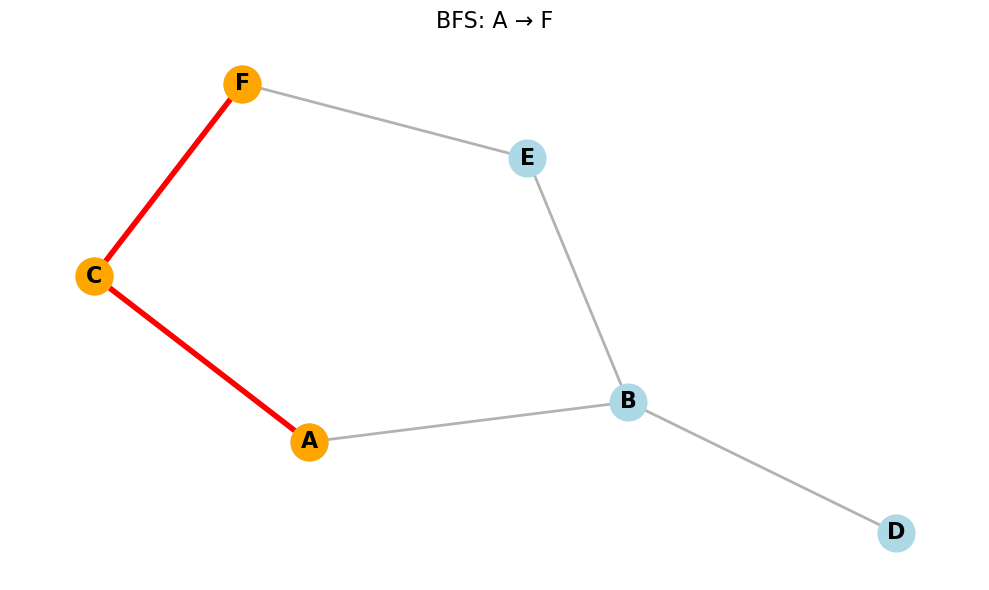

Caminho: A → C → F
Comprimento: 2 passos


In [62]:
#not
import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo NetworkX
G = nx.Graph(graph)

# Encontrar caminho
caminho = bfs(graph, 'A', 'F')

# Desenhar
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Desenha todos os nós e edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.3)

# Destaca o caminho encontrado
if caminho:
    path_edges = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
    nx.draw_networkx_edges(G, pos, path_edges, edge_color='red', width=4)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='orange', node_size=700)

plt.title(f"BFS: {caminho[0]} → {caminho[-1]}", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Caminho: {' → '.join(caminho)}")
print(f"Comprimento: {len(caminho)-1} passos")